In [52]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy import log, exp
from scipy import stats
from scipy.special import gammaln
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import optlearner

learner = optlearner.ProbabilityLearner()

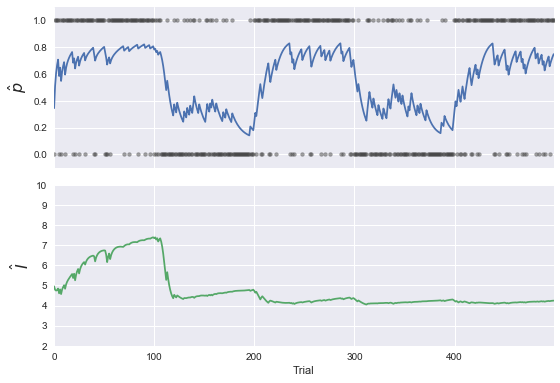

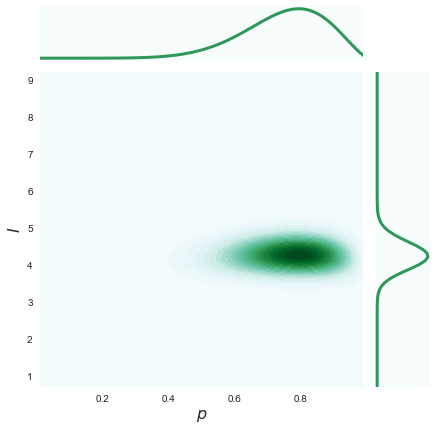

In [9]:
np.random.seed = 6;
# static_p = np.ones(500) * 0.75
static_p = np.repeat([0.75, 0.25, 0.75, 0.25, 0.75], 100)
static_y = stats.binom.rvs(1, static_p)

learner.reset()
learner.fit(static_y)
learner.plot_history()
learner.plot_joint()

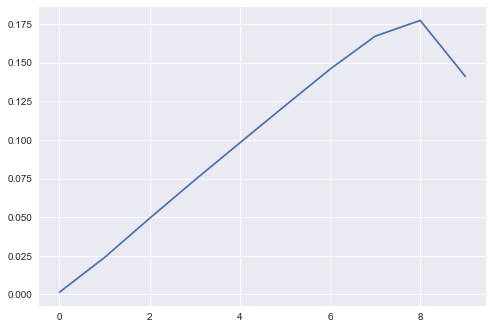

In [5]:
learner._p_trans

array([[[6.43809326e-01],
        [6.67074444e-02],
        [1.91689693e-03],
        [3.19146324e-05],
        [3.31952857e-07],
        [2.22869902e-09],
        [9.65861551e-12],
        [2.61501277e-14],
        [4.10203513e-17],
        [1.78456494e-20]],

       [[2.60187647e-01],
        [4.53435784e-01],
        [2.19155476e-01],
        [6.13699104e-02],
        [1.07362874e-02],
        [1.21238685e-03],
        [8.83724207e-05],
        [4.02427605e-06],
        [1.06175766e-07],
        [7.76909550e-10]],

       [[7.52261254e-02],
        [3.07219049e-01],
        [3.47964554e-01],
        [2.28343418e-01],
        [9.36132814e-02],
        [2.47727880e-02],
        [4.23156239e-03],
        [4.51566890e-04],
        [2.79196558e-05],
        [4.78746318e-07]],

       [[1.73713625e-02],
        [1.28104272e-01],
        [2.61999682e-01],
        [3.10459205e-01],
        [2.29828454e-01],
        [1.09822544e-01],
        [3.38740907e-02],
        [6.52738565e-03],
      

(0.5, 1.5)

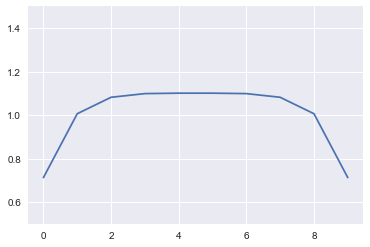

In [88]:
p_p1 = np.linspace(0.01, 0.99, 10)
p = p_p1
I_p1 = log(100)

p_grid = np.linspace(0.01, 0.99, 10)
I_grid = log(10)
joint_grid = np.meshgrid(p_grid, p_grid, I_grid, indexing="ij")

p_p1 = joint_grid[0]
p = joint_grid[1]
I_p1 = joint_grid[2]

a = 1 + exp(I_p1) * p
b = 1 + exp(I_p1) * (1 - p)

logkerna = (a - 1) * log(p_p1)
logkernb = (b - 1) * log(1 - p_p1)
betaln_ab = gammaln(a) + gammaln(b) - gammaln(a + b)
p_trans = exp(logkerna + logkernb - betaln_ab)

p_trans = p_trans / p_trans.sum(axis = 0)
p_trans.sum(axis = 1)
plt.plot(p_trans.sum(axis = 1))
plt.ylim([0.5,1.5])